## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Create a function which adds two numbers

Create a function add_numbers which adds two numbers. Demonstrate in a seperate cell that your function works.

In [3]:
def add_numbers(a,b):
    return (a+b)

# Use: print add_numbers(2,3) should return 5.

In [4]:
print add_numbers(2,3)

5


## Problem 3: Load in sales data using Pandas Library 

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

#df = pd.read_csv('C:\Users\lhren\Desktop\spring 2017\DS\Advertising.csv', index_col=0)
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 3, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

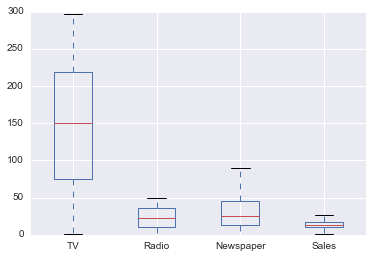

In [8]:
df.boxplot()

### Problem 3, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

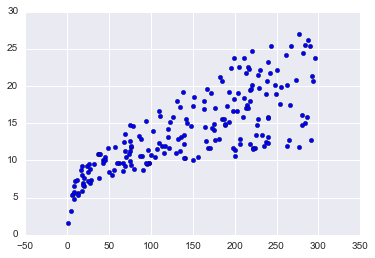

In [7]:
plt.scatter(df.TV,df.Sales)

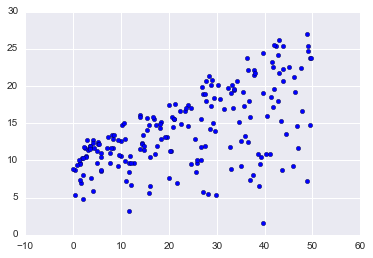

In [8]:
plt.scatter(df.Radio,df.Sales)

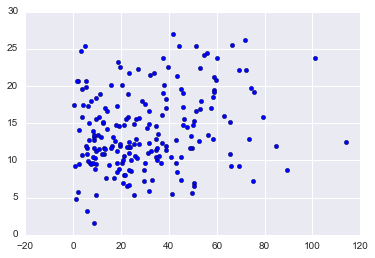

In [9]:
plt.scatter(df.Newspaper,df.Sales)

In [2]:
from pandas.tools.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000003C217B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CE57550>]], dtype=object)

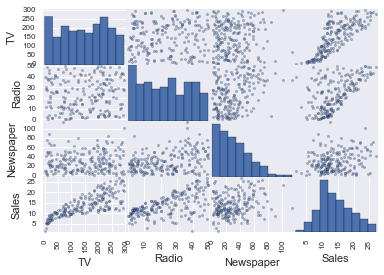

In [3]:
scatter_matrix(df)

### Probelm 3, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
# Set y to be the sales in df
y = df.Sales
# Set X to be just the features described above in df.
X = df.drop(labels='Sales', axis=1)

X_train = X[0:int(len(df)*0.8)]
X_test = X[int(len(df)*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(len(df)*0.8)]
y_test = y[int(len(df)*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean square error
 
print("Residual mean sum of squares: "+str(np.mean((regr.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))




# Evaluate perforamnce using R^2 and RMSE


('Coefficients: \n', array([ 0.0472521 ,  0.179922  , -0.00094408]))
Residual mean sum of squares: 2.79114518628
Variance score: 0.90


### Bonus: How could you have improved performance?

## Problem 4:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 100 iterations b = 0.00185273186245, m = 0.0662147881578, error = 0.336524483844


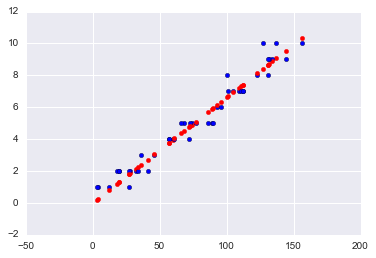

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.00011
Running...
After 100 iterations b = 0.00197126426788, m = 0.0662135990691, error = 0.336510433192


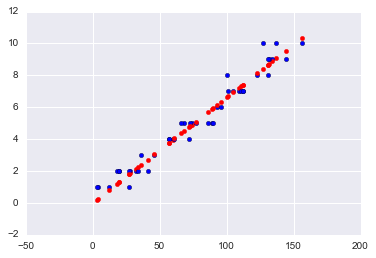

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.00012
Running...
After 100 iterations b = 0.00208974154814, m = 0.0662124102461, error = 0.336496395671


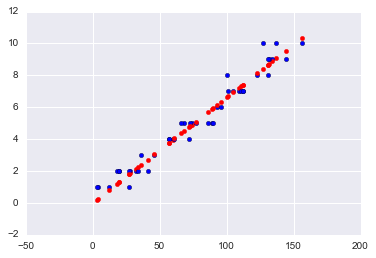

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.00013
Running...
After 100 iterations b = 0.0021438795028, m = 0.0598031514889, error = 0.648740010015


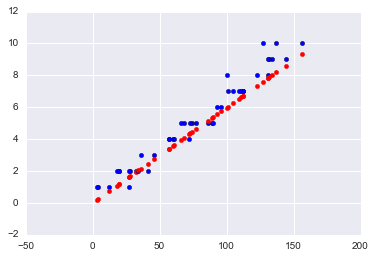

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.00014
Running...
After 100 iterations b = -123.381302042, m = -12299.2333977, error = 1.15032138838e+12


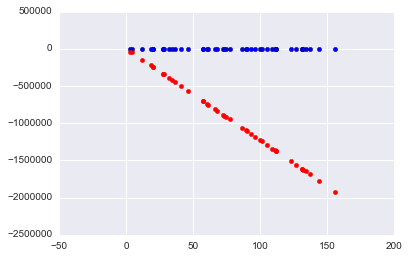

In [18]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,learning_rate):
    #data example with one line of headers
    points = genfromtxt("C:\Users\lhren\Desktop\Fall2016\LR\Data\copier_maintenance.txt")
    
    points = points[1:]
    
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}, learning rate = {3}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points), learning_rate)
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    plt.show()
for l_rate in [0.0001,0.00011,0.00012,0.00013,0.00014]:
    run(100,l_rate)

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 0 iterations b = 0, m = 0, error = 33.6888888889


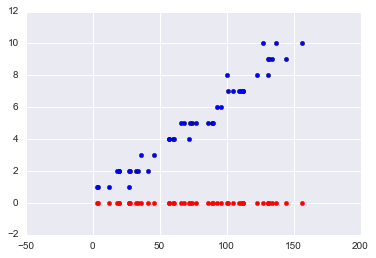

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 1 iterations b = 0.00102222222222, m = 0.100711111111, error = 9.37954561321


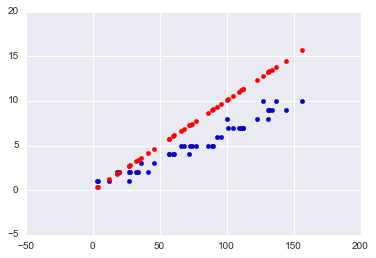

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 2 iterations b = 0.000508059851852, m = 0.0482702380247, error = 2.78848451735


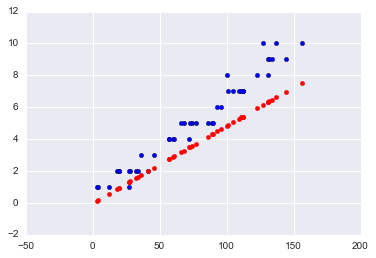

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 3 iterations b = 0.000793898431434, m = 0.0755762354675, error = 1.00143070039


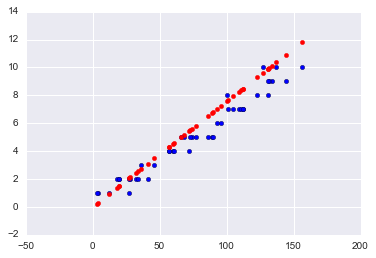

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 4 iterations b = 0.000663172362306, m = 0.0613577081675, error = 0.516900779528


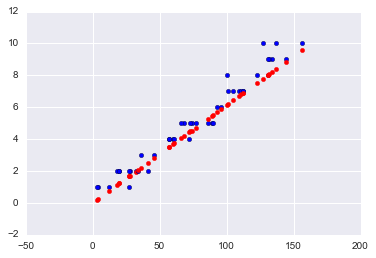

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 5 iterations b = 0.000749352374807, m = 0.0687611723602, error = 0.385527796556


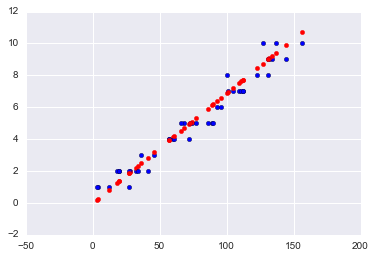

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 6 iterations b = 0.000722587644154, m = 0.0649059763162, error = 0.349907239509


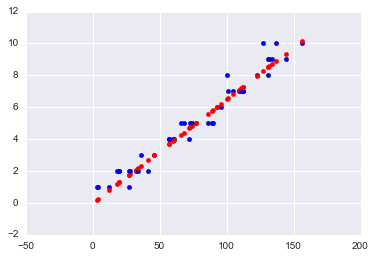

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 7 iterations b = 0.000754632856771, m = 0.0669132111518, error = 0.340248304935


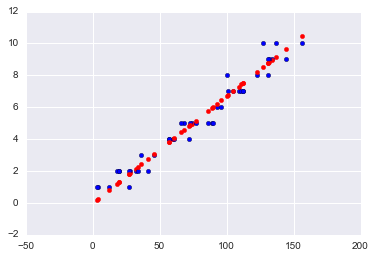

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 8 iterations b = 0.00075605463832, m = 0.0658678540315, error = 0.337628417588


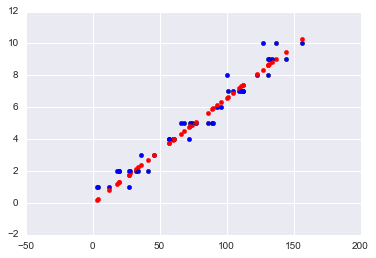

Starting gradient descent at b = 0, m = 0, error = 33.6888888889, learning rate = 0.0001
Running...
After 9 iterations b = 0.00077342131612, m = 0.0664119941551, error = 0.336917046851


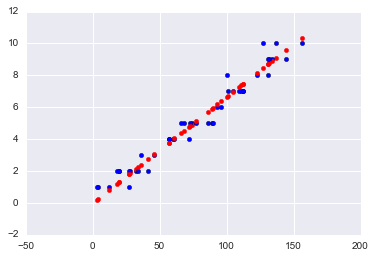

In [19]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num,0.0001)
    plt.show()
    